In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
hw_engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
base = automap_base()

# reflect the tables
base.prepare(hw_engine, reflect=True)

In [6]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station

In [8]:
#review the data types
inspector = inspect(hw_engine)

columns = inspector.get_columns('measurement')
for column in columns:
    print(f"Column: {column['name']}, Type: {column['type']}")

Column: id, Type: INTEGER
Column: station, Type: TEXT
Column: date, Type: TEXT
Column: prcp, Type: FLOAT
Column: tobs, Type: FLOAT


In [9]:
# Create our session (link) from Python to the DB
session = Session(hw_engine)

row_one = session.query(measurement).first()
row_one.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x20c903b7908>,
 'station': 'USC00519397',
 'prcp': 0.08,
 'tobs': 65.0,
 'id': 1,
 'date': '2010-01-01'}

In [10]:
obj = session.query(measurement).order_by(measurement.id.desc()).first()
obj.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x20c903d5f08>,
 'station': 'USC00516128',
 'prcp': 0.45,
 'tobs': 76.0,
 'id': 19550,
 'date': '2017-08-23'}

In [11]:
dates_test = session.query(func.DATE(measurement.date)).distinct().all()

In [12]:
#join the respective data sets, on id
master_db = session.query(measurement).join(station,station.station==measurement.station).all()
# df = pd.DataFrame(master_db.__dict__, index='id')
master_df = pd.DataFrame([item.__dict__ for item in master_db], columns=['id','name','longitude','latitude','station','elevation','date','tobs','prcp'])
# master_db.__dict__
# master_df.head(5)
master_df

,id,name,longitude,latitude,station,elevation,date,tobs,prcp
0,1,NaN,NaN,NaN,USC00519397,NaN,2010-01-01,65.0,0.08
1,2,NaN,NaN,NaN,USC00519397,NaN,2010-01-02,63.0,0.00
2,3,NaN,NaN,NaN,USC00519397,NaN,2010-01-03,74.0,0.00
3,4,NaN,NaN,NaN,USC00519397,NaN,2010-01-04,76.0,0.00
4,5,NaN,NaN,NaN,USC00519397,NaN,2010-01-06,73.0,NaN
...,...,...,...,...,...,...,...,...,...
19545,19546,NaN,NaN,NaN,USC00516128,NaN,2017-08-19,71.0,0.09
19546,19547,NaN,NaN,NaN,USC00516128,NaN,2017-08-20,78.0,NaN
19547,19548,NaN,NaN,NaN,USC00516128,NaN,2017-08-21,76.0,0.56
19548,19549,NaN,NaN,NaN,USC00516128,NaN,2017-08-22,76.0,0.50


In [13]:
#test the new dataframe using df.query methods

master_df.query("latitude == 21.2716")

,id,name,longitude,latitude,station,elevation,date,tobs,prcp


In [14]:
# Requirement: Design a query to retrieve the last 12 months of precipitation data and plot the results. Starting from the most recent data point in the database. 


In [15]:
# Find the most recent date in the data set.
latest_date = session.query(func.max(measurement.date)).first()
latest_date[0]

'2017-08-23'

In [16]:
# START HERE: Calculate the date one year from the last date in data set.
from datetime import timedelta
one_year_lookback = dt.date(2017,8,23) - timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
measurement_tp = session.query(measurement.date, measurement.prcp).filter(measurement.date >= one_year_lookback).all()
measurement_tp

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [17]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names and sort the dataframe by date

prcp_df = pd.DataFrame(measurement_tp, columns=['date','precipitation']).sort_values(by='date',ascending=True)

prcp_df


,date,precipitation
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15
...,...,...
1527,2017-08-22,0.00
1008,2017-08-23,0.00
360,2017-08-23,0.00
1528,2017-08-23,0.08


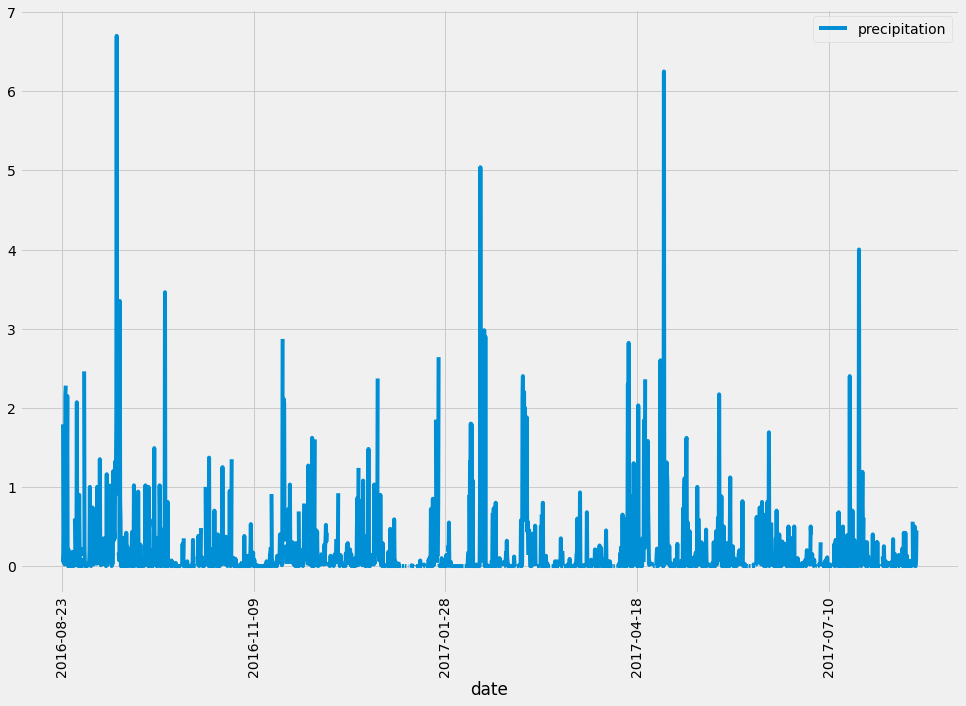

In [18]:
# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(x="date",y="precipitation",rot=90,figsize=(15,10))

In [19]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_stats = pd.DataFrame(prcp_df["precipitation"].describe())

In [32]:
station_list = session.query(station.station).all()
station_list

[('USC00519397'),
 ('USC00513117'),
 ('USC00514830'),
 ('USC00517948'),
 ('USC00518838'),
 ('USC00519523'),
 ('USC00519281'),
 ('USC00511918'),
 ('USC00516128')]

In [21]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(station.station).count()
station_count

9

In [22]:
# Requrement: Design a query to find the most active stations (i.e. which stations have the most rows?)
# Start here: List the stations and their counts in descending order.
stations_count = session.query(measurement.station,func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).first()
stations_count[0]

'USC00519281'

In [23]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station_stats = session.query(measurement.station,func.min(measurement.tobs),func.max(measurement.tobs),func.avg(measurement.tobs)).filter(measurement.station == stations_count[0]).all()
most_active_station_stats


[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [24]:
# Using the most active station id - Query the last 12 months of temperature observation data (TOBS) for this station and plot the results as a histogram
#Design a query to get the previous 12 months of temperature observation (TOBS) data. To do so, complete the following steps:
#Filter by the station that has the greatest number of observations.

mas_latest_date = session.query(func.max(measurement.date)).filter(measurement.station =='USC00519281').all()
mas_latest_date

[('2017-08-18')]

In [25]:
mas_one_year_lookback = dt.date(2017,8,18) - timedelta(days=365)
mas_one_year_lookback

datetime.date(2016, 8, 18)

In [26]:
mas_tobs_data = session.query(measurement.tobs).filter(measurement.date >= mas_one_year_lookback).all()
mas_tobs_data

[(80.0),
 (77.0),
 (80.0),
 (76.0),
 (77.0),
 (81.0),
 (79.0),
 (80.0),
 (79.0),
 (77.0),
 (78.0),
 (78.0),
 (79.0),
 (80.0),
 (81.0),
 (80.0),
 (79.0),
 (75.0),
 (79.0),
 (76.0),
 (76.0),
 (80.0),
 (79.0),
 (78.0),
 (76.0),
 (78.0),
 (78.0),
 (75.0),
 (79.0),
 (80.0),
 (79.0),
 (81.0),
 (77.0),
 (77.0),
 (78.0),
 (76.0),
 (82.0),
 (81.0),
 (78.0),
 (80.0),
 (80.0),
 (79.0),
 (80.0),
 (80.0),
 (80.0),
 (79.0),
 (79.0),
 (79.0),
 (80.0),
 (80.0),
 (79.0),
 (78.0),
 (76.0),
 (75.0),
 (80.0),
 (80.0),
 (79.0),
 (80.0),
 (79.0),
 (78.0),
 (78.0),
 (80.0),
 (81.0),
 (79.0),
 (77.0),
 (79.0),
 (78.0),
 (77.0),
 (77.0),
 (78.0),
 (77.0),
 (78.0),
 (77.0),
 (76.0),
 (77.0),
 (77.0),
 (77.0),
 (77.0),
 (77.0),
 (76.0),
 (75.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (72.0),
 (71.0),
 (72.0),
 (77.0),
 (77.0),
 (77.0),
 (77.0),
 (77.0),
 (75.0),
 (76.0),
 (76.0),
 (75.0),
 (72.0),
 (74.0),
 (75.0),
 (73.0),
 (76.0),
 (75.0),
 (68.0),
 (75.0),
 (75.0),
 (72.0),
 (69.0),
 (71.0),
 (68.0),
 (67.0),
 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020C90A61408>]],
      dtype=object)

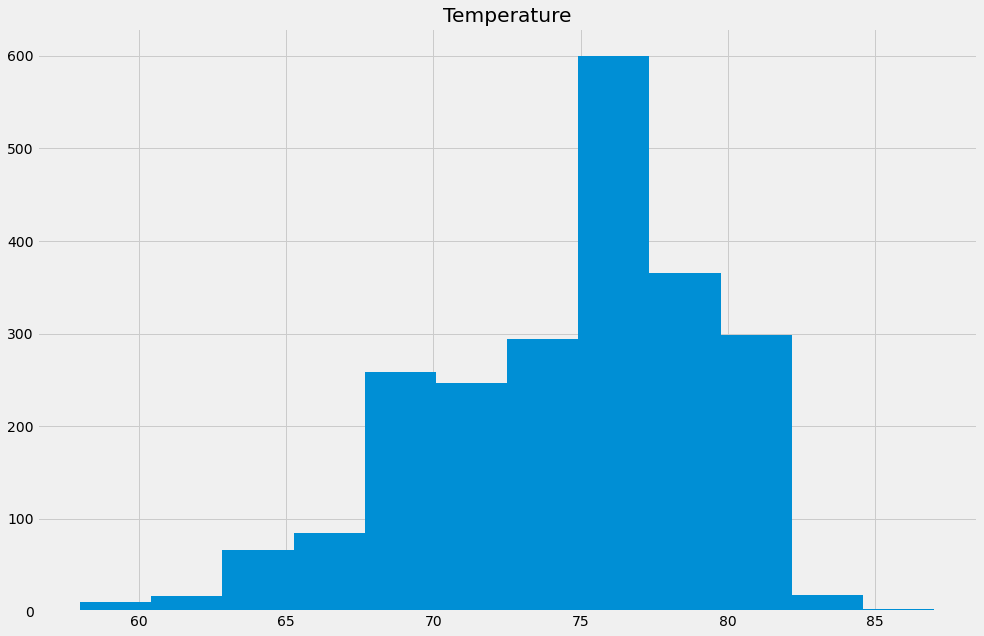

In [27]:
#Plot the results as a histogram with 'bins=12'
mas_tobs_df = pd.DataFrame(mas_tobs_data)
mas_tobs_df.rename(columns = {'tobs':'Temperature'}, inplace = True)


mas_tobs_hist = mas_tobs_df.hist(column='Temperature',bins=12,grid=True,figsize = (15,10))

mas_tobs_hist

In [28]:
# Close Session
session.close()